In [13]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import scipy.stats as ss

from imblearn.over_sampling import SMOTENC, RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from src import models as md
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("https://minio.lab.sspcloud.fr/jbrablx/ai_insurance/raw/train.csv")

In [15]:
df.drop_duplicates(inplace=True)

num_features = ['Age', 'Annual_Premium', 'Vintage']
cat_features = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vehicle_Age']

preprocessor = md.create_preprocessor(num_features, cat_features)

# Split dataset
X = df.drop('Response', axis=1) 
y = df['Response']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
rs = RandomOverSampler(random_state=42)
X_train_over, y_train_over = rs.fit_resample(X_train, y_train)

smote = SMOTENC(random_state=42, k_neighbors=15, categorical_features=cat_features)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [20]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  
lr_model = LogisticRegression(random_state=42, n_jobs=-1)

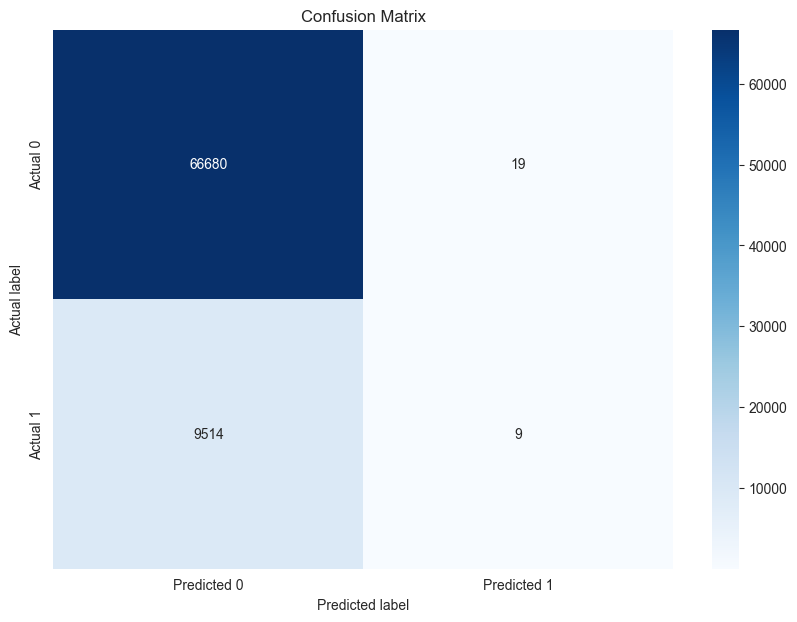

           Metric Value
0  Accuracy Score  0.87
1   ROC AUC Score  0.85
2  Recall Class 1  0.00
3  Recall Class 0  1.00
4    Best cut-off  0.50


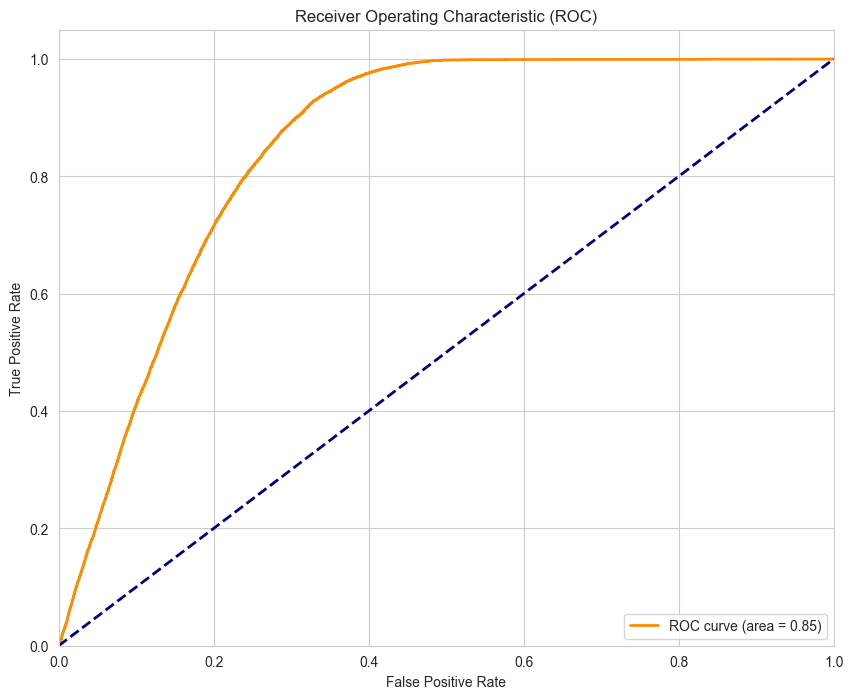

In [21]:
lr_model = LogisticRegression(random_state=42, n_jobs=-1, 
                              C = 0.1, max_iter = 100, solver ='newton-cg')

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', lr_model)])
pipeline.fit(X_train, y_train)
md.get_metrics(pipeline, X_val, y_val, 0.5)


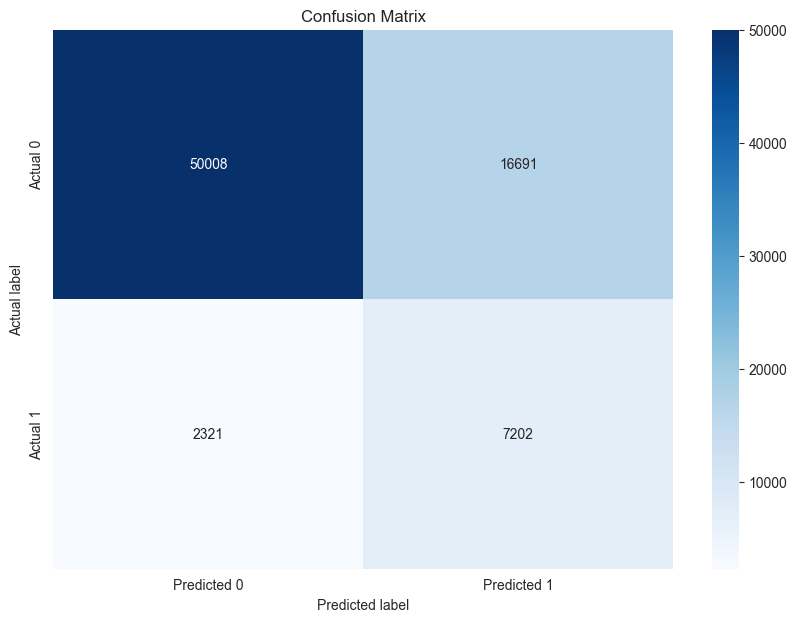

           Metric Value
0  Accuracy Score  0.75
1   ROC AUC Score  0.83
2  Recall Class 1  0.76
3  Recall Class 0  0.75
4    Best cut-off  0.50


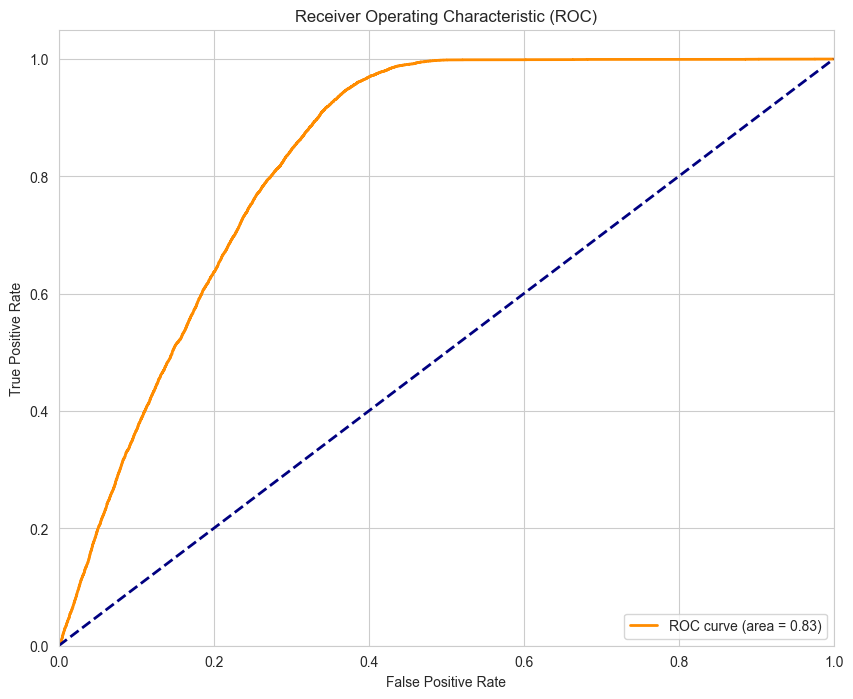

In [22]:

lr_model = LogisticRegression(random_state=42, n_jobs=-1, 
                              C = 0.1, max_iter = 100, solver ='lbfgs') 

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', lr_model)])

pipeline.fit(X_train_smote, y_train_smote)

md.get_metrics(pipeline, X_val, y_val, 0.5)


/Users/eunicekoffi/Desktop/ai_insurance/projetAI/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


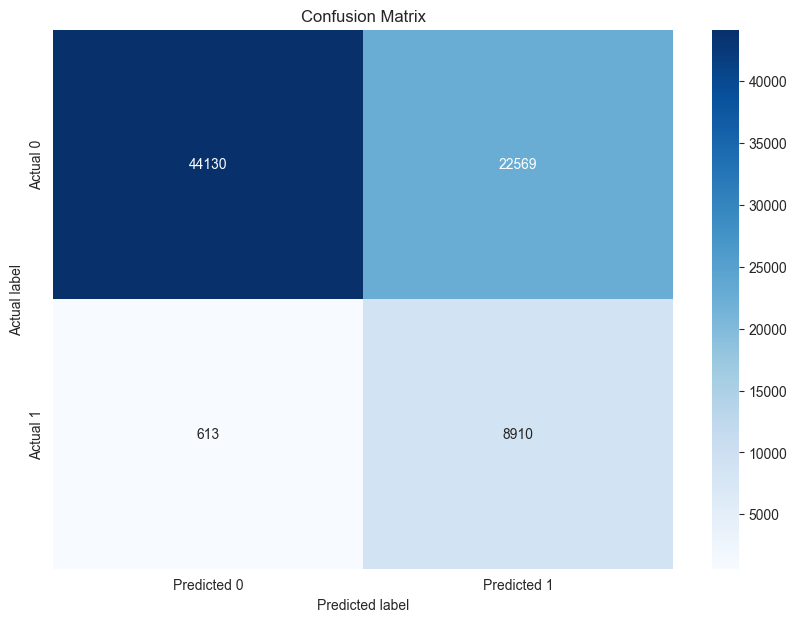

           Metric Value
0  Accuracy Score  0.70
1   ROC AUC Score  0.85
2  Recall Class 1  0.94
3  Recall Class 0  0.66
4    Best cut-off  0.50


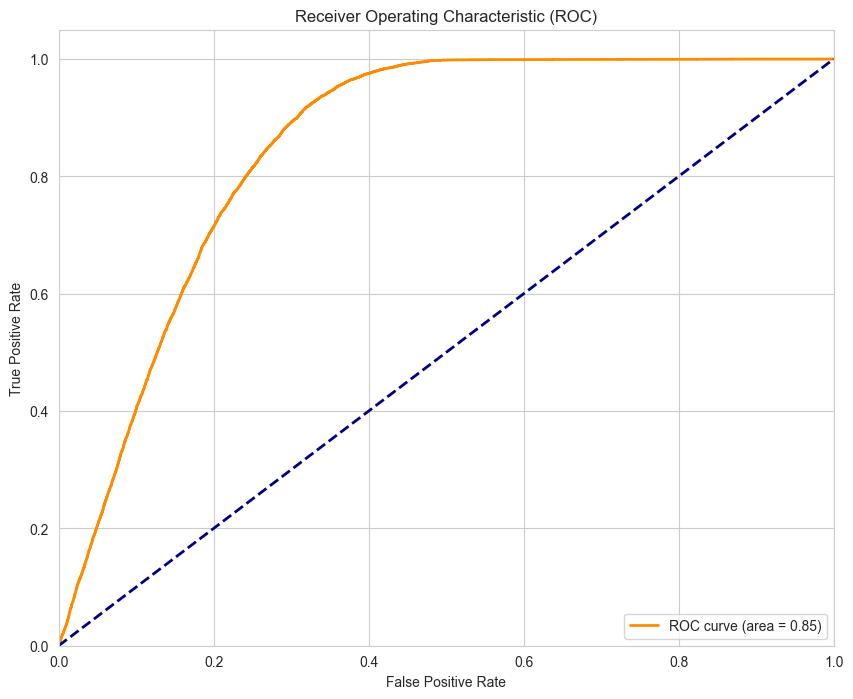

In [23]:

lr_model = LogisticRegression(random_state=42, n_jobs=-1, 
                              C = 10, max_iter = 100, solver ='liblinear') 

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', lr_model)])

pipeline.fit(X_train_over, y_train_over)

md.get_metrics(pipeline, X_val, y_val, 0.5)

In [24]:
#md.train_model(lr_model, X_train, y_train, preprocessor, method=None)

# Results
# Best params: {'model__C': 0.1, 'model__max_iter': 100, 'model__solver': 'newton-cg'}
# Best cross-validation score: 0.8485571224517534

In [25]:
#md.train_model(lr_model, X_train, y_train, preprocessor, method="SMOTE")

#  Results 
# Best params: {'model__C': 0.1, 'model__max_iter': 100, 'model__solver': 'lbfgs'}
# Best cross-validation score: 0.8973180168674924

In [26]:
#md.train_model(lr_model, X_train, y_train, preprocessor, method="OVER")

# Results
# Best params: {'model__C': 10, 'model__max_iter': 100, 'model__solver': 'liblinear'}
# Best cross-validation score: 0.848728813629684 

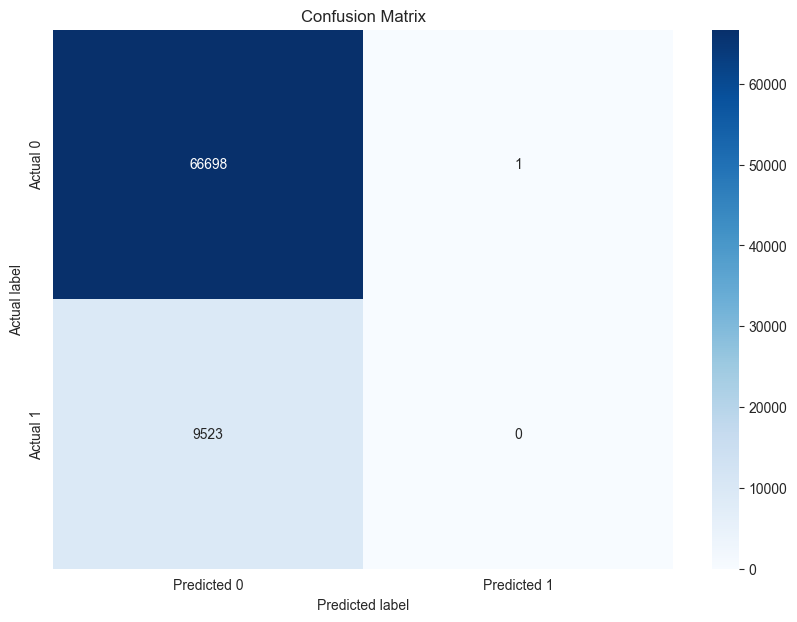

           Metric Value
0  Accuracy Score  0.88
1   ROC AUC Score  0.86
2  Recall Class 1  0.00
3  Recall Class 0  1.00
4    Best cut-off  0.50


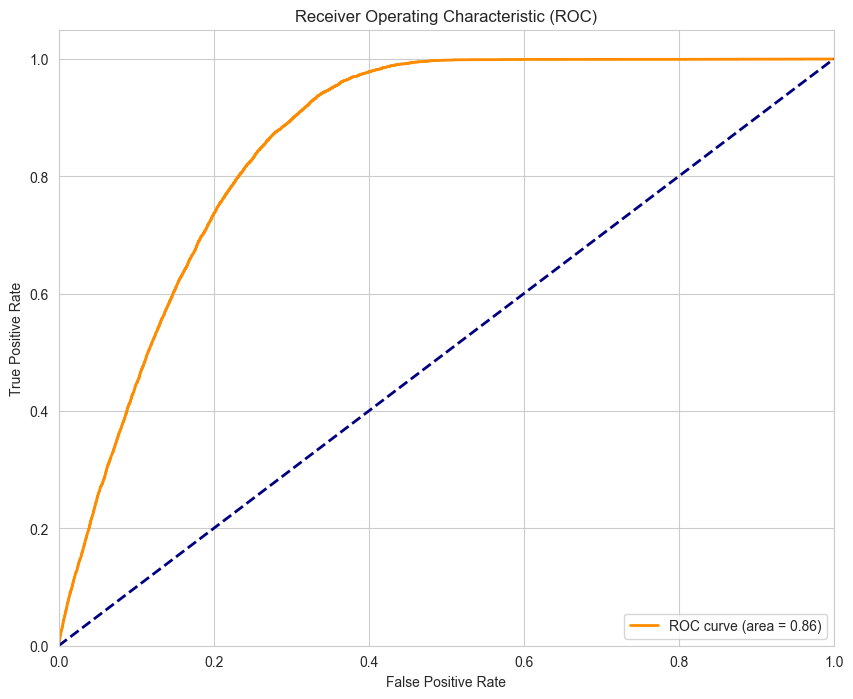

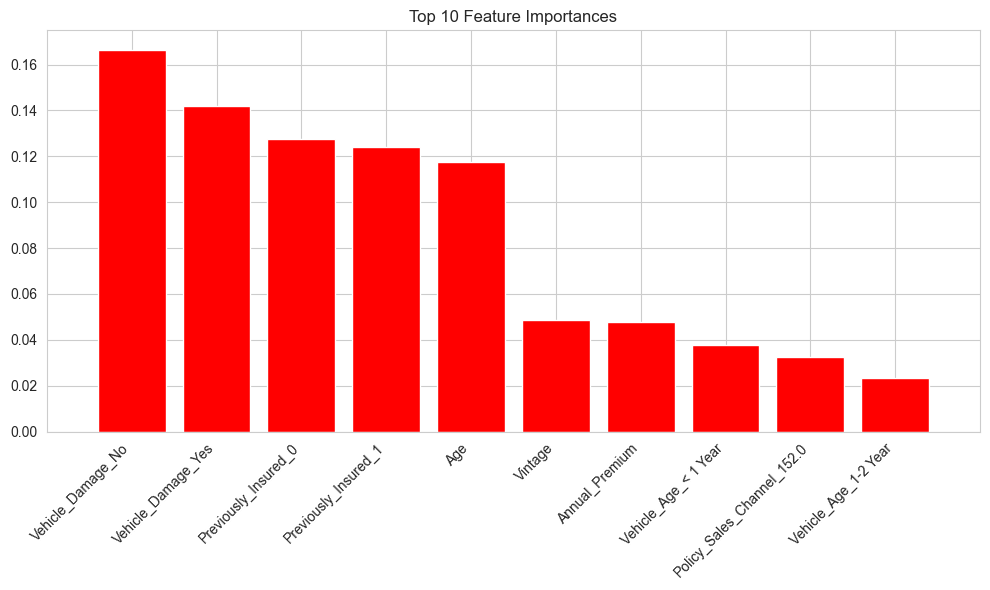

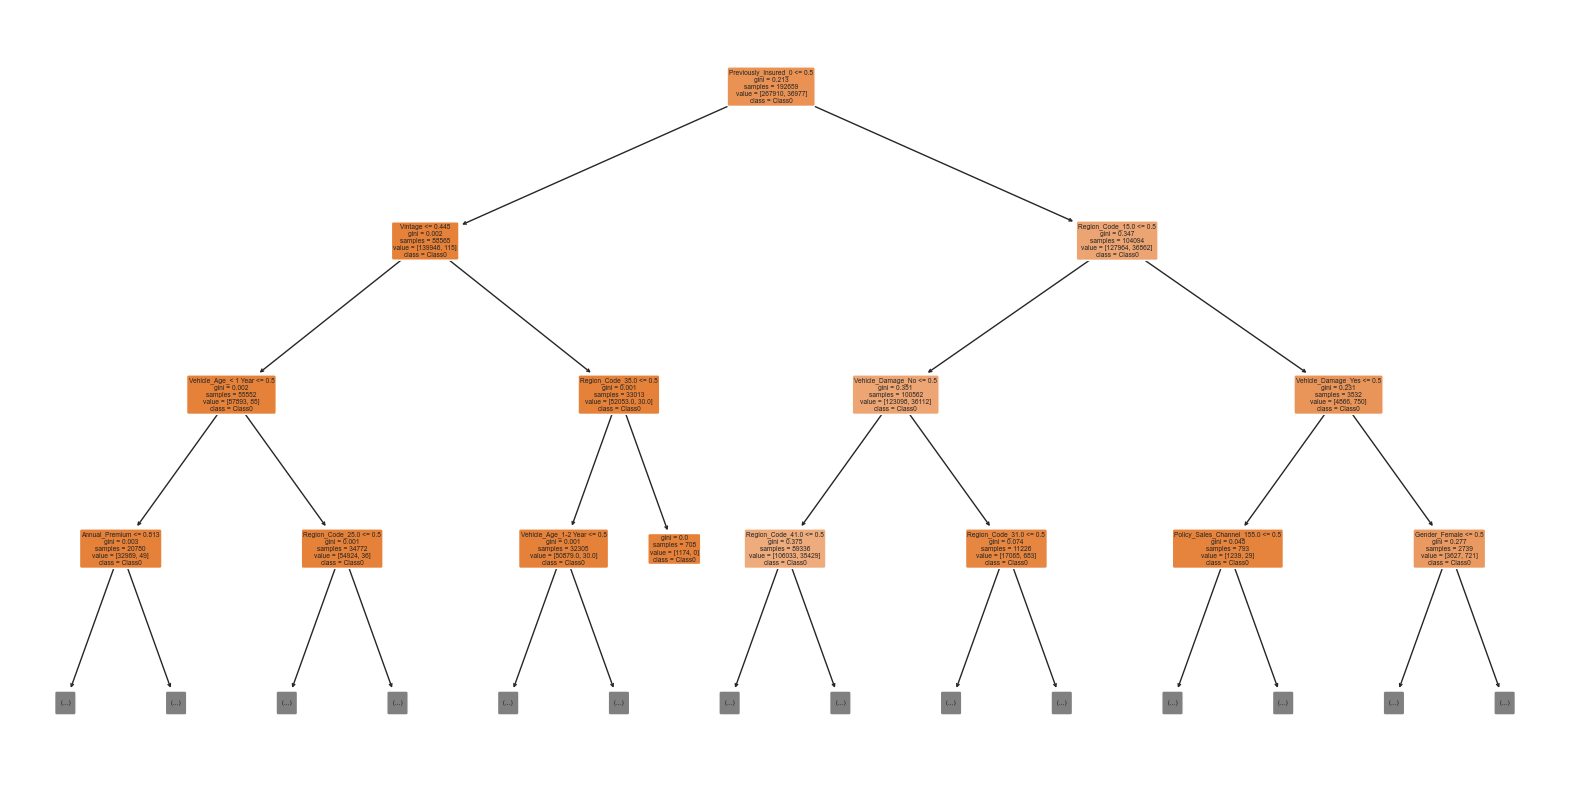

In [27]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                  max_depth = 20, min_samples_split = 10, n_estimators = 200) 

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', rf_model)])
pipeline.fit(X_train, y_train)

md.get_metrics(pipeline, X_val, y_val, 0.5)


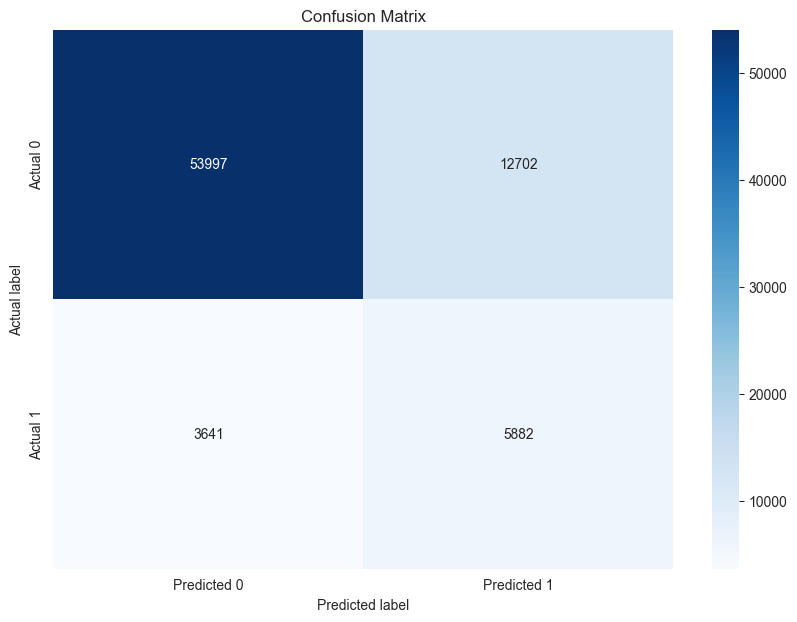

           Metric Value
0  Accuracy Score  0.79
1   ROC AUC Score  0.84
2  Recall Class 1  0.62
3  Recall Class 0  0.81
4    Best cut-off  0.50


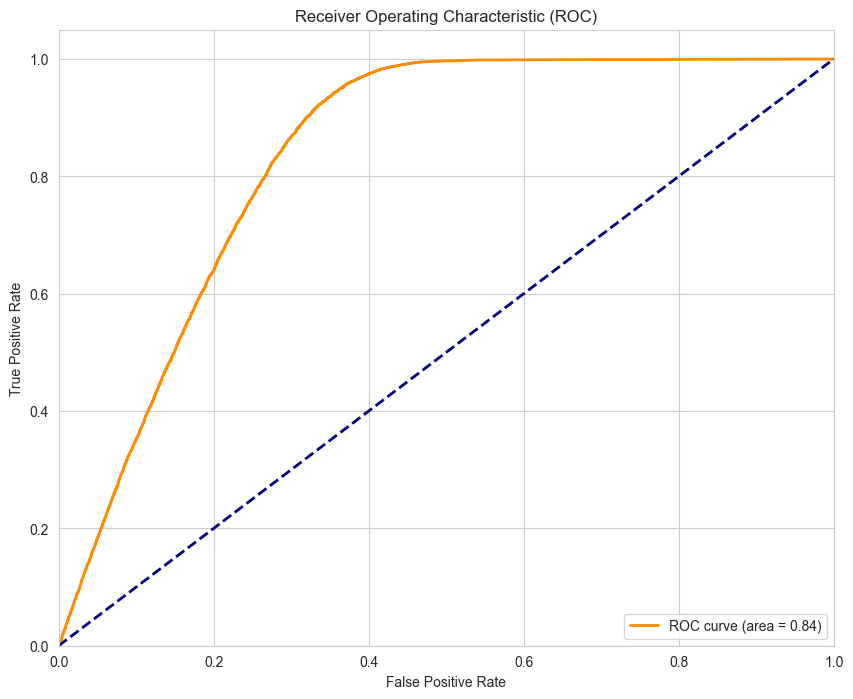

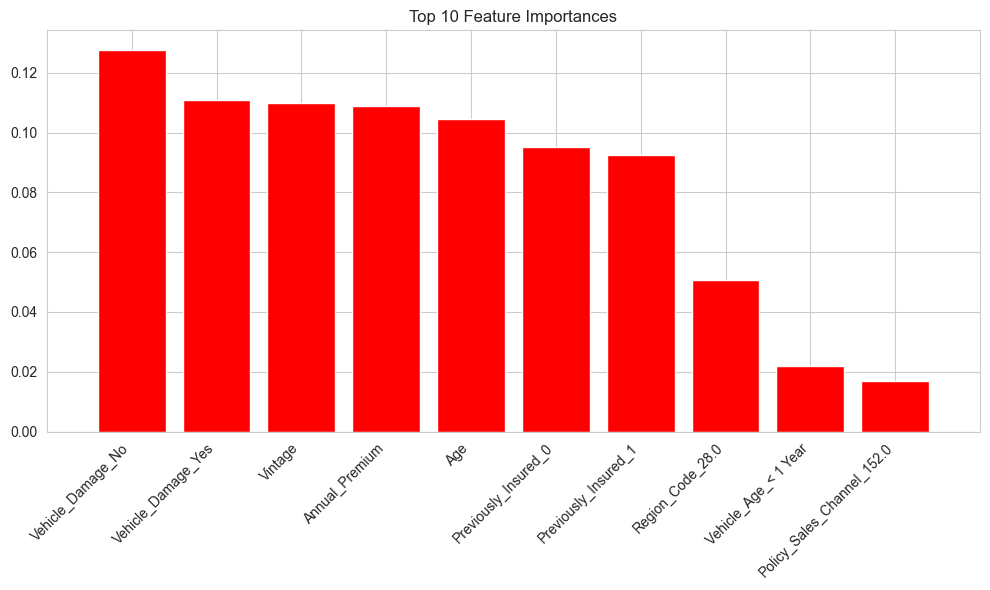

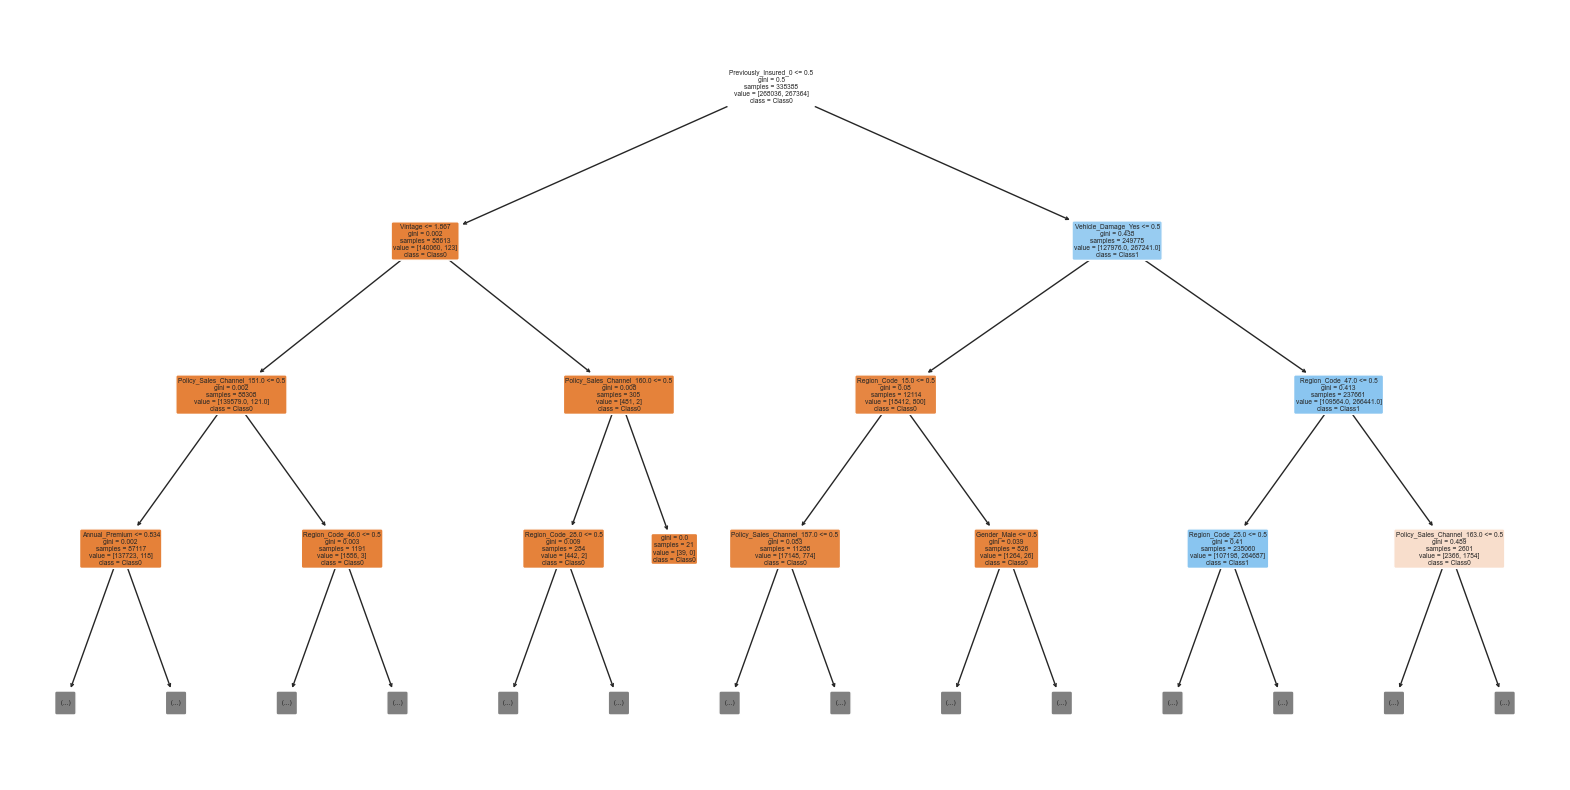

In [28]:

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                  max_depth = None, min_samples_split = 10, n_estimators = 200) 

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', rf_model)])

pipeline.fit(X_train_smote, y_train_smote)

md.get_metrics(pipeline, X_val, y_val, 0.5)


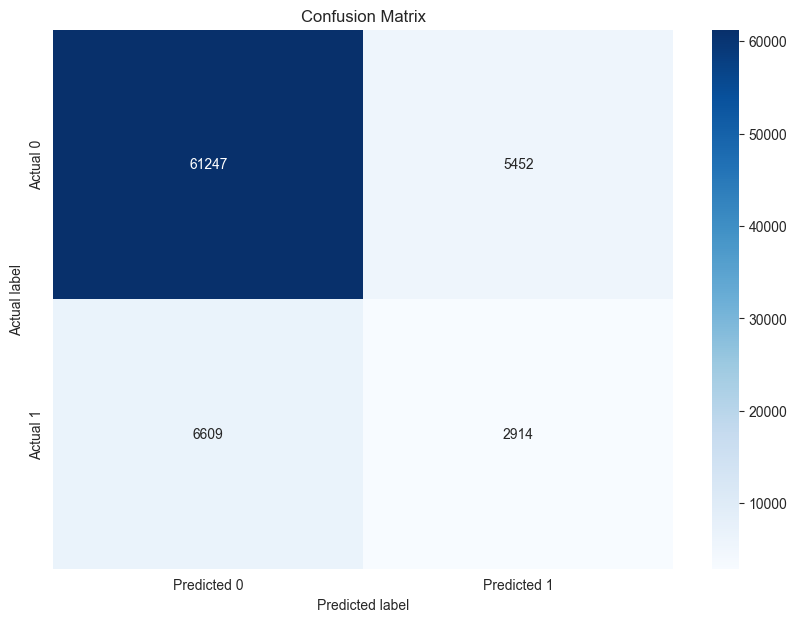

           Metric Value
0  Accuracy Score  0.84
1   ROC AUC Score  0.83
2  Recall Class 1  0.31
3  Recall Class 0  0.92
4    Best cut-off  0.50


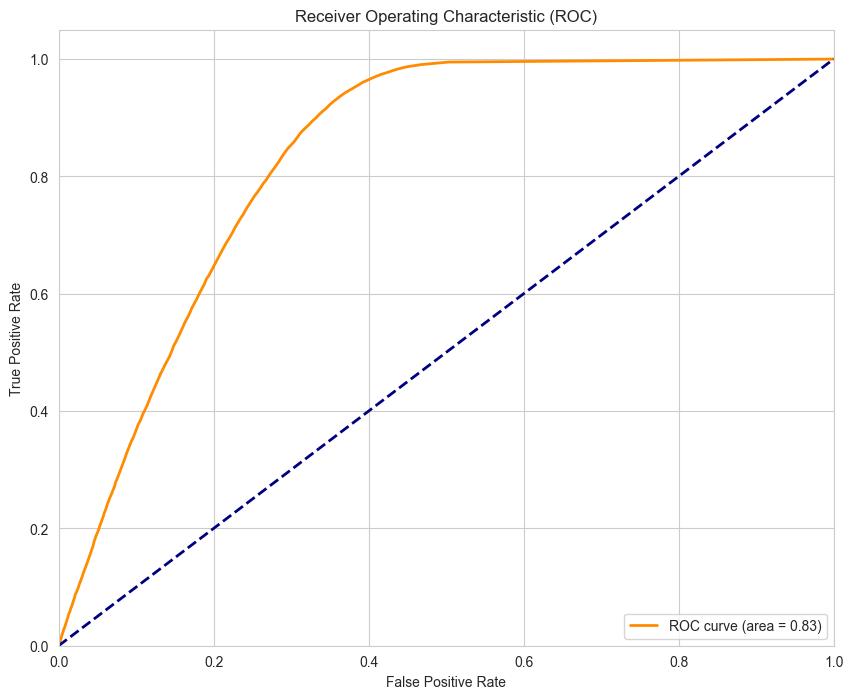

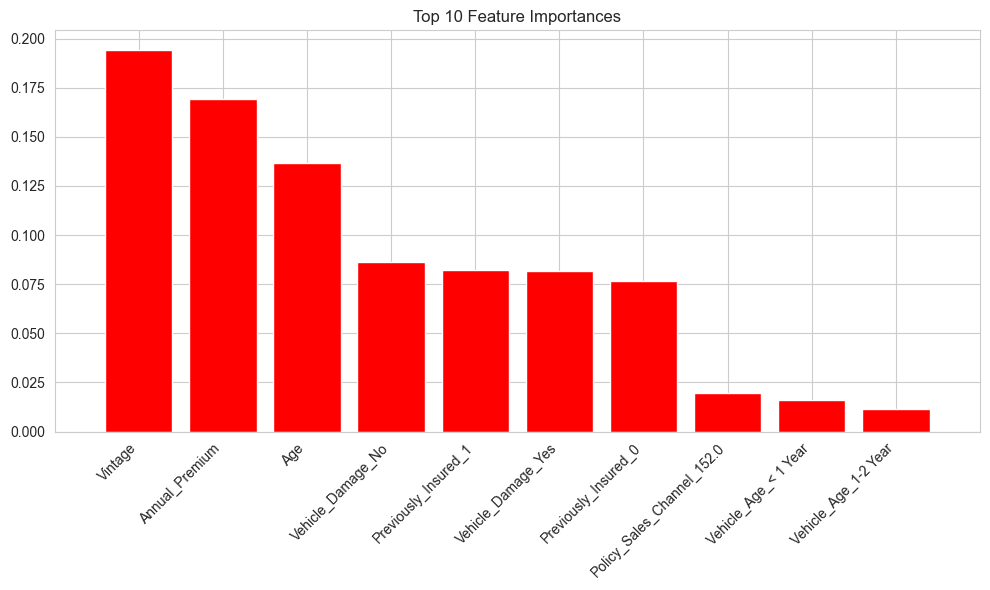

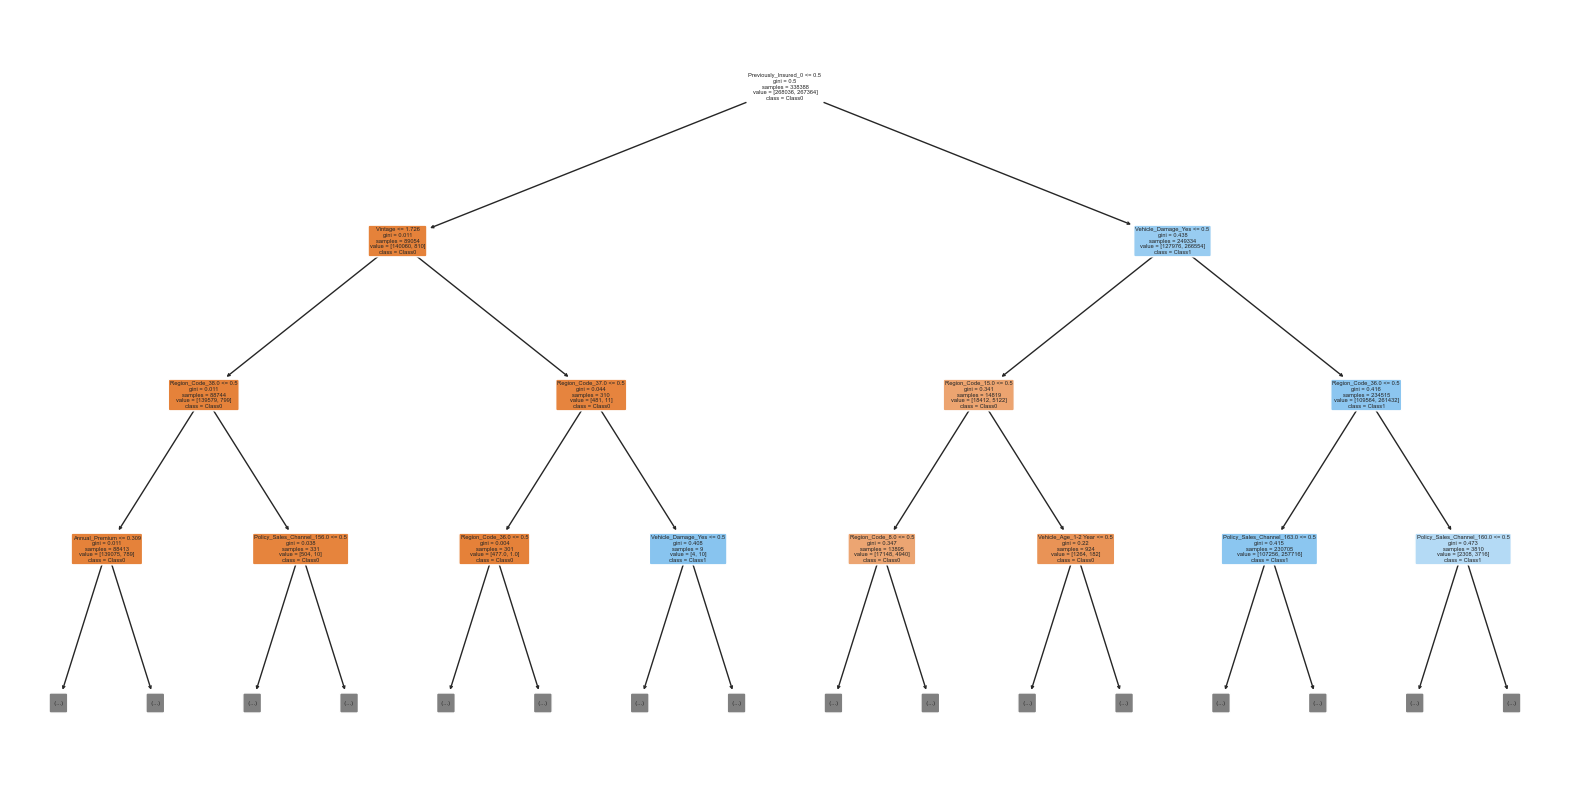

In [29]:

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                  max_depth = None, min_samples_split = 2, n_estimators = 200) 

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', rf_model)])

pipeline.fit(X_train_over, y_train_over)

md.get_metrics(pipeline, X_val, y_val, 0.5)

In [30]:
#md.train_model(rf_model, X_train, y_train, preprocessor, method=None)

# Results
# Best params: {'model__max_depth': 20, 'model__min_samples_split': 10, 'model__n_estimators': 200}
# Best cross-validation score: 0.8548586582055616

In [31]:
#md.train_model(rf_model, X_train, y_train, preprocessor, method="SMOTE")

# Results
# Best params: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 200}
# Best cross-validation score: 0.9165931470282762

In [32]:
#md.train_model(rf_model, X_train, y_train, preprocessor, method="OVER")

# Results 
# Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
# Best cross-validation score: 0.9993544791552271